In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.utils import plot_model

Using TensorFlow backend.


## PREPROCESSING

In [2]:
EnvironmentalMetrics = pd.read_csv("EnvironmentalMetrics.csv")

In [3]:
EnvironmentalMetricsColumns={
    
    "Numara":"Number",\
    "Proje Tarihi":"ProjectDate",\
    "Projenin buyuklugu (Buyuk, Kucuk, Orta)":"ProjectSize",\
    "Projenin Onemi (Yuksek, Orta, Dusuk)":"ProjectImportance",\
    "Proje ekibindeki  yazilimci sayisi ":"NumberOfDeveloper",\
    "Proje ekibindeki analist sayisi":"NumberOfAnalyst",\
    "Proje ekibindeki testci sayisi":"NumberOfTester",\
    "Analistin yasi":"AnalystAge",\
    "Analistin tecrubesi (yil)":"AnalystExperience",\
    "Benzer proje tecrubesi var mi? ":"SimilarProjectExperienceOfAnalyst",\
    "Analiz icin harcanan sure (Adam/Gun)":"TimeSpentForAnalysis",\
    "Yazilimcinin yasi":"DeveloperAge",\
    "Yazilimcinin tecrubesi (yil)":"DeveloperExperience",\
    "Benzer proje tecrubesi var mi? .1":"SimilarProjectExperienceOfDeveloper",\
    "Yazilim icin harcanan sure (Adam/Gun)":"TimeSpentForSoftware",\
    "Yazilimcinin bildigi yazilim dili sayisi?":"NumberOfProgrammingLanguageDeveloperKnows",\
    "Gelistirme Metodolojisi":"DevelopingMethodology",\
    "Yazilim dili":"ProgrammingLanguageOfSoftware",\
    "Kod Kalite Kontrol Tool'u kullanildi mi?":"UseOfQualityControlTool",\
    "Satir Sayisi":"NumberOfLinesOfCode",\
    "Hedef Platformu":"TargetPlatform",\
    "Yazilimci testi yapildi mi?":"MakingDeveloperTesting",\
    "Hazir platform uzerine urun gelistirmesi mi?":"DevelopingOnReadyPlatform",\
    "Yazilimda danismanlik alindi mi?":"ReceivingSoftwareConsultancy",\
    "Testci yasi":"TesterAge",\
    "Testci tecrubesi (yil)":"TesterExperience",\
    "Benzer proje tecrubesi var mi?":"SimilarProjectExperienceOfTester",\
    "Test icin harcanan sure (Adam/Gun)":"TimeSpentForTesting",\
    "Test otomasyon kullanildi mi?":"UseOfTestAutomation",\
    "Test otomasyon yuzdesi":"PercentageOfTestAutomation",\
    "Kac farkli browser'da test edildi ?":"NumberOfBrowserTestedOn",\
    "Durum kac kere test edildi":"NumberOfTesting",\
    "Test senaryo sayisi":"NumberOfTestScenario",\
    "Test No":"TestNumber",\
    "Case No":"CaseNumber",\
    "Gruplama":"Grouping",\
    "Hata Kodu":"ErrorCode"
    
}

EnvironmentalMetricsRenamed = EnvironmentalMetrics.rename(columns=EnvironmentalMetricsColumns)

In [4]:
categoricalColumns = ["Number","ProjectDate","ProjectSize","ProjectImportance","SimilarProjectExperienceOfAnalyst",\
                      "SimilarProjectExperienceOfDeveloper","DevelopingMethodology","ProgrammingLanguageOfSoftware",\
                      "UseOfQualityControlTool","TargetPlatform","MakingDeveloperTesting","DevelopingOnReadyPlatform",\
                      "ReceivingSoftwareConsultancy","SimilarProjectExperienceOfTester","UseOfTestAutomation",\
                      "Grouping","ErrorCode","TestNumber","CaseNumber"]

numericalColumns = ["NumberOfDeveloper","NumberOfAnalyst","NumberOfTester","AnalystAge","AnalystExperience",\
                    "TimeSpentForAnalysis","DeveloperAge","DeveloperExperience","TimeSpentForSoftware",\
                    "NumberOfProgrammingLanguageDeveloperKnows","NumberOfLinesOfCode","TesterAge","TesterExperience",\
                    "TimeSpentForTesting","PercentageOfTestAutomation","NumberOfBrowserTestedOn","NumberOfTesting",\
                    "NumberOfTestScenario"]

In [5]:
labelEncoder = LabelEncoder()
EnvironmentalMetricsEncoded = EnvironmentalMetricsRenamed
for categoricalCol in categoricalColumns:
    EnvironmentalMetricsEncoded[categoricalCol]= labelEncoder.fit_transform(EnvironmentalMetricsEncoded[categoricalCol])
EnvironmentalMetricsEncoded.head()

,Number,ProjectDate,ProjectSize,ProjectImportance,NumberOfDeveloper,NumberOfAnalyst,NumberOfTester,AnalystAge,AnalystExperience,SimilarProjectExperienceOfAnalyst,...,TimeSpentForTesting,UseOfTestAutomation,PercentageOfTestAutomation,NumberOfBrowserTestedOn,NumberOfTesting,NumberOfTestScenario,TestNumber,CaseNumber,Grouping,ErrorCode
0,0,0,1,0,1,1,1,33,5,0,...,8,0,0.1,3,5,64,0,0,5,4
1,0,0,1,0,1,1,1,33,5,0,...,8,0,0.1,3,5,64,0,1,28,1
2,0,0,1,0,1,1,1,33,5,0,...,8,0,0.1,3,5,64,0,2,5,5
3,0,0,1,0,1,1,1,33,5,0,...,8,0,0.1,3,5,64,0,3,17,1
4,0,0,1,0,1,1,1,33,5,0,...,8,0,0.1,3,5,64,0,4,22,1


In [6]:
normalizer = MinMaxScaler()
EnvironmentalMetricsEncoded[numericalColumns] = normalizer.fit_transform(EnvironmentalMetricsEncoded[numericalColumns])
EnvironmentalMetricsEncoded.head()

,Number,ProjectDate,ProjectSize,ProjectImportance,NumberOfDeveloper,NumberOfAnalyst,NumberOfTester,AnalystAge,AnalystExperience,SimilarProjectExperienceOfAnalyst,...,TimeSpentForTesting,UseOfTestAutomation,PercentageOfTestAutomation,NumberOfBrowserTestedOn,NumberOfTesting,NumberOfTestScenario,TestNumber,CaseNumber,Grouping,ErrorCode
0,0,0,1,0,0.0,0.0,0.0,1.0,0.8,0,...,0.0,0,0.333333,0.4,0.0,0.136808,0,0,5,4
1,0,0,1,0,0.0,0.0,0.0,1.0,0.8,0,...,0.0,0,0.333333,0.4,0.0,0.136808,0,1,28,1
2,0,0,1,0,0.0,0.0,0.0,1.0,0.8,0,...,0.0,0,0.333333,0.4,0.0,0.136808,0,2,5,5
3,0,0,1,0,0.0,0.0,0.0,1.0,0.8,0,...,0.0,0,0.333333,0.4,0.0,0.136808,0,3,17,1
4,0,0,1,0,0.0,0.0,0.0,1.0,0.8,0,...,0.0,0,0.333333,0.4,0.0,0.136808,0,4,22,1


In [7]:
X = EnvironmentalMetricsEncoded.iloc[:,:-1].values
y = EnvironmentalMetricsEncoded.iloc[:,-1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## RANDOM FOREST CLASSIFIER

In [9]:
rfc = RandomForestClassifier(max_depth=13,
                             max_features=36,
                             n_estimators=100,
                             class_weight="balanced_subsample")
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=13, max_features=36,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [10]:
rfc_confusion_matrix = confusion_matrix(y_test, rfc.predict(X_test))
print(rfc_confusion_matrix)
print("Random Forest Train Accuracy:", accuracy_score(y_train, rfc.predict(X_train)))
print("Random Forest Test Accuracy:", accuracy_score(y_test, rfc.predict(X_test)))
print("Precision - Recall - F1:", precision_recall_fscore_support(y_test, rfc.predict(X_test), labels=np.unique(y_test), average='weighted')[:-1])

[[ 11   5   0   0   0   1   2   2  14]
 [  5 526   1   0  25  45  19  14  31]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   3   0   0   0   0   3]
 [  1   9   0   0  39   3   2   3   7]
 [  3  19   0   0   5  58   8   0  16]
 [  2  13   0   0   4   0  41   2   8]
 [  0   2   0   0   2   1   0   7   1]
 [ 13  14   0   2   5  20   6   5 308]]
Random Forest Train Accuracy: 0.9069288389513108
Random Forest Test Accuracy: 0.7432634730538922
Precision - Recall - F1: (0.7684216813335957, 0.7432634730538922, 0.752751986914617)


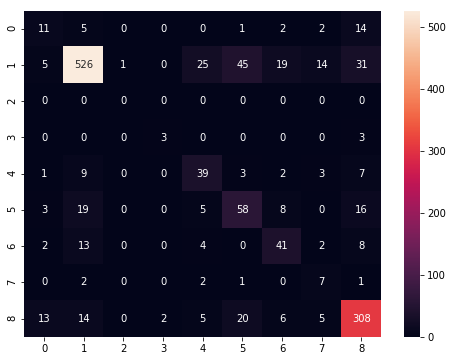

In [28]:
fig, ax = plt.subplots(figsize=(8,6))
sbn.heatmap(rfc_confusion_matrix, annot=True, annot_kws={"size": 10}, fmt='g', ax=ax)

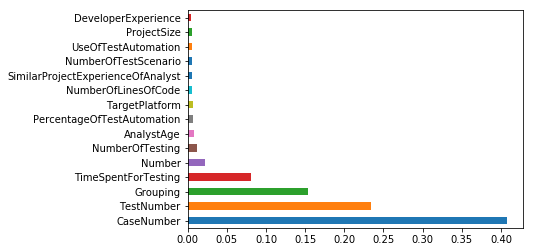

In [12]:
featImportances = pd.Series(data = rfc.feature_importances_,
                            index = EnvironmentalMetricsEncoded.iloc[:,:-1].columns)
featImportances.nlargest(15).plot(kind = 'barh')

## K-NN CLASSIFIER

In [13]:
knc = KNeighborsClassifier(n_neighbors=3,
                           weights='uniform',
                           algorithm='auto',
                           leaf_size=30,
                           p=1)
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')

In [14]:
knc_confusion_matrix = confusion_matrix(y_test,knc.predict(X_test))
print(knc_confusion_matrix)
print("K-NN Train Accuracy:", accuracy_score(y_train, knc.predict(X_train)))
print("K-NN Test Accuracy:", accuracy_score(y_test, knc.predict(X_test)))
print("Precision - Recall - F1:", precision_recall_fscore_support(y_test, knc.predict(X_test), labels=np.unique(y_test), average='weighted')[:-1])

[[  7  10   0   0   0   0   0  18]
 [  8 597   0  12  16   6   3  24]
 [  0   3   2   0   0   0   0   1]
 [  1  27   0  24   3   1   0   8]
 [  2  53   0   2  38   2   1  11]
 [  1  37   0   1   1  26   1   3]
 [  1   4   0   1   0   0   4   3]
 [ 13  39   0   5   6   6   0 304]]
K-NN Train Accuracy: 0.8910112359550562
K-NN Test Accuracy: 0.75
Precision - Recall - F1: (0.7362483424439383, 0.75, 0.7350038263953365)


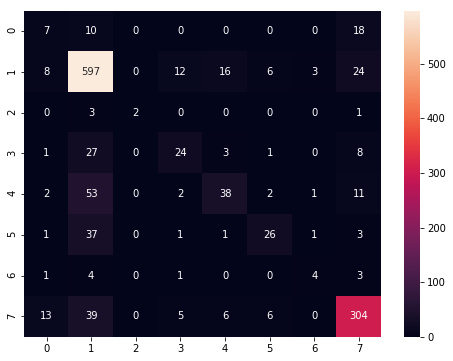

In [27]:
fig, ax = plt.subplots(figsize=(8,6))
sbn.heatmap(knc_confusion_matrix, annot=True, annot_kws={"size": 10}, fmt='g', ax=ax)

## XGBOOST CLASSIFIER

In [16]:
warnings.filterwarnings('ignore')

xgb = XGBClassifier(booster='gbtree',
                    gamma = 3,
                    max_depth = 18,
                    n_estimators = 2000,
                    learning_rate = 0.3,
                    subsample = 1.0,
                    colsample_bytree = 0.5,
                    min_child_weight = 5,
                    scale_pos_weight=200)

xgb.fit(X_train, 
        y_train, 
        early_stopping_rounds=30, 
        eval_metric="mlogloss", 
        eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-mlogloss:1.60294	validation_1-mlogloss:1.62402
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 30 rounds.
[1]	validation_0-mlogloss:1.37755	validation_1-mlogloss:1.41199
[2]	validation_0-mlogloss:1.19258	validation_1-mlogloss:1.24571
[3]	validation_0-mlogloss:1.08748	validation_1-mlogloss:1.14896
[4]	validation_0-mlogloss:1.02421	validation_1-mlogloss:1.08848
[5]	validation_0-mlogloss:0.965667	validation_1-mlogloss:1.03617
[6]	validation_0-mlogloss:0.898188	validation_1-mlogloss:0.980642
[7]	validation_0-mlogloss:0.836033	validation_1-mlogloss:0.927035
[8]	validation_0-mlogloss:0.796442	validation_1-mlogloss:0.892378
[9]	validation_0-mlogloss:0.76961	validation_1-mlogloss:0.870618
[10]	validation_0-mlogloss:0.735602	validation_1-mlogloss:0.844373
[11]	validation_0-mlogloss:0.72459	validation_1-mlogloss:0.836236
[12]	validation_0-mlogloss:0.710149	validation_1-mlo

[121]	validation_0-mlogloss:0.550484	validation_1-mlogloss:0.715774
[122]	validation_0-mlogloss:0.550484	validation_1-mlogloss:0.715773
[123]	validation_0-mlogloss:0.549939	validation_1-mlogloss:0.715147
[124]	validation_0-mlogloss:0.549939	validation_1-mlogloss:0.715141
[125]	validation_0-mlogloss:0.549142	validation_1-mlogloss:0.714164
[126]	validation_0-mlogloss:0.549142	validation_1-mlogloss:0.714161
[127]	validation_0-mlogloss:0.549143	validation_1-mlogloss:0.714157
[128]	validation_0-mlogloss:0.547517	validation_1-mlogloss:0.713683
[129]	validation_0-mlogloss:0.547517	validation_1-mlogloss:0.713682
[130]	validation_0-mlogloss:0.547166	validation_1-mlogloss:0.713613
[131]	validation_0-mlogloss:0.54635	validation_1-mlogloss:0.713676
[132]	validation_0-mlogloss:0.546348	validation_1-mlogloss:0.713674
[133]	validation_0-mlogloss:0.544311	validation_1-mlogloss:0.713074
[134]	validation_0-mlogloss:0.54261	validation_1-mlogloss:0.711651
[135]	validation_0-mlogloss:0.542611	validation_1-

[242]	validation_0-mlogloss:0.529522	validation_1-mlogloss:0.704084
[243]	validation_0-mlogloss:0.529522	validation_1-mlogloss:0.704086
[244]	validation_0-mlogloss:0.529521	validation_1-mlogloss:0.704086
[245]	validation_0-mlogloss:0.529521	validation_1-mlogloss:0.704086
[246]	validation_0-mlogloss:0.529521	validation_1-mlogloss:0.704086
[247]	validation_0-mlogloss:0.529521	validation_1-mlogloss:0.704087
[248]	validation_0-mlogloss:0.529521	validation_1-mlogloss:0.704087
[249]	validation_0-mlogloss:0.529521	validation_1-mlogloss:0.704087
[250]	validation_0-mlogloss:0.529521	validation_1-mlogloss:0.704087
[251]	validation_0-mlogloss:0.529521	validation_1-mlogloss:0.704087
[252]	validation_0-mlogloss:0.529521	validation_1-mlogloss:0.704087
[253]	validation_0-mlogloss:0.529521	validation_1-mlogloss:0.704088
[254]	validation_0-mlogloss:0.528885	validation_1-mlogloss:0.703442
[255]	validation_0-mlogloss:0.528158	validation_1-mlogloss:0.702991
[256]	validation_0-mlogloss:0.528157	validation_

[363]	validation_0-mlogloss:0.520117	validation_1-mlogloss:0.699294
[364]	validation_0-mlogloss:0.520117	validation_1-mlogloss:0.699294
Stopping. Best iteration:
[334]	validation_0-mlogloss:0.520117	validation_1-mlogloss:0.69929



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=3,
              learning_rate=0.3, max_delta_step=0, max_depth=18,
              min_child_weight=5, missing=None, n_estimators=2000, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=200, seed=None,
              silent=None, subsample=1.0, verbosity=1)

In [17]:
xgb_confusion_matrix = confusion_matrix(y_test, xgb.predict(X_test))
print(xgb_confusion_matrix)
print ("XGBoost Train Accuracy:", accuracy_score(y_train, xgb.predict(X_train)))
print ("XGboost Test Accuracy:", accuracy_score(y_test, xgb.predict(X_test)))
print("Precision - Recall - F1:", precision_recall_fscore_support(y_test, xgb.predict(X_test), labels=np.unique(y_test), average='weighted')[:-1])

[[  3  10   0   0   0   1   0  21]
 [  0 627   0   1   7   7   0  24]
 [  0   2   0   0   0   0   0   4]
 [  0  41   0   8   1   0   0  14]
 [  0  48   0   1  36   6   0  18]
 [  0  31   0   1   0  29   0   9]
 [  0   9   0   0   0   0   0   4]
 [  1  34   0   1   2   3   0 332]]
XGBoost Train Accuracy: 0.8273408239700375
XGboost Test Accuracy: 0.7747005988023952
Precision - Recall - F1: (0.755780011549348, 0.7747005988023952, 0.736063500029167)


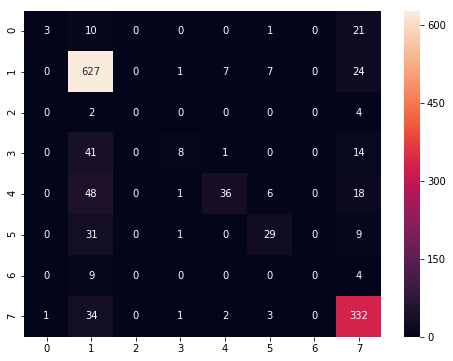

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
sbn.heatmap(xgb_confusion_matrix, annot=True, annot_kws={"size": 10}, fmt='g', ax=ax)

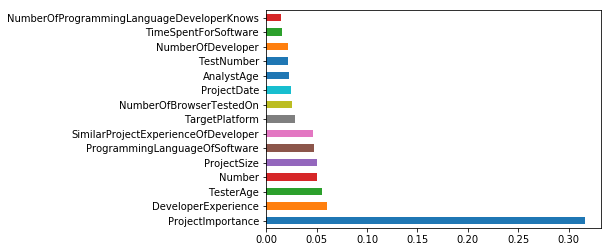

In [19]:
featImportances = pd.Series(data = xgb.feature_importances_,
                            index = EnvironmentalMetricsEncoded.iloc[:,:-1].columns)
featImportances.nlargest(15).plot(kind = 'barh')

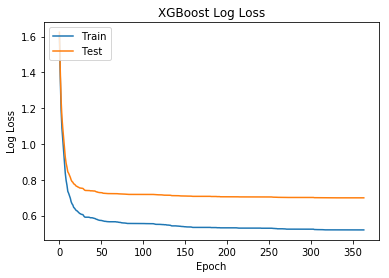

In [20]:
plt.plot(xgb.evals_result()['validation_0']['mlogloss'])
plt.plot(xgb.evals_result()['validation_1']['mlogloss'])
plt.title('XGBoost Log Loss')
plt.ylabel('Log Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('modelacc')
plt.show()

## DEEP LEARNING

In [22]:
warnings.filterwarnings('ignore')

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(36, kernel_initializer = 'uniform', activation = 'relu', input_dim = 36))
model.add(Dropout(0.1))

model.add(Dense(54, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(54, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(9, kernel_initializer = 'uniform', activation = 'softmax'))

# summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 36)                1332      
_________________________________________________________________
dropout_4 (Dropout)          (None, 36)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 54)                1998      
_________________________________________________________________
dropout_5 (Dropout)          (None, 54)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 54)                2970      
_________________________________________________________________
dropout_6 (Dropout)          (None, 54)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 9)                 495       
Total para

In [23]:
warnings.filterwarnings('ignore')
# Class Weights
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
# Early Stopping
earlyStoppingCallback = [EarlyStopping(monitor='val_loss', patience=20)]
# Compiling the NN
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# Train the NN
model.fit(X_train,
          y_train, 
          batch_size = 32, 
          class_weight=class_weights, 
          epochs = 400, 
          callbacks=earlyStoppingCallback, 
          validation_data=(X_test,y_test))

W0409 01:00:17.025839 140028494296832 deprecation_wrapper.py:119] From /home/abdullahdeliogullari/.local/lib/python3.5/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0409 01:00:17.064025 140028494296832 deprecation_wrapper.py:119] From /home/abdullahdeliogullari/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0409 01:00:17.186235 140028494296832 deprecation.py:323] From /home/abdullahdeliogullari/.local/lib/python3.5/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 5340 samples, validate on 1336 samples
Epoch 1/400
5340/5340 [==============================] - 1s 170us/step - loss: 1.4787 - acc: 0.4663 - val_loss: 1.3307 - val_acc: 0.4985
Epoch 2/400
5340/5340 [==============================] - 0s 64us/step - loss: 1.2947 - acc: 0.5354 - val_loss: 1.2199 - val_acc: 0.5973
Epoch 3/400
5340/5340 [==============================] - 0s 66us/step - loss: 1.2006 - acc: 0.5991 - val_loss: 1.1578 - val_acc: 0.6205
Epoch 4/400
5340/5340 [==============================] - 0s 66us/step - loss: 1.1468 - acc: 0.6251 - val_loss: 1.1495 - val_acc: 0.6085
Epoch 5/400
5340/5340 [==============================] - 0s 77us/step - loss: 1.1306 - acc: 0.6356 - val_loss: 1.1420 - val_acc: 0.6220
Epoch 6/400
5340/5340 [==============================] - 0s 66us/step - loss: 1.1178 - acc: 0.6326 - val_loss: 1.1006 - val_acc: 0.6280
Epoch 7/400
5340/5340 [==============================] - 0s 67us/step - loss: 1.0805 - acc: 0.6431 - val_loss: 1.0792 - val_acc: 0.6347

5340/5340 [==============================] - 0s 61us/step - loss: 0.8456 - acc: 0.7002 - val_loss: 0.8765 - val_acc: 0.6961
Epoch 61/400
5340/5340 [==============================] - 0s 60us/step - loss: 0.8575 - acc: 0.6985 - val_loss: 0.8800 - val_acc: 0.6961
Epoch 62/400
5340/5340 [==============================] - 0s 59us/step - loss: 0.8359 - acc: 0.7017 - val_loss: 0.8825 - val_acc: 0.6856
Epoch 63/400
5340/5340 [==============================] - 0s 60us/step - loss: 0.8474 - acc: 0.6970 - val_loss: 0.8662 - val_acc: 0.6954
Epoch 64/400
5340/5340 [==============================] - 0s 64us/step - loss: 0.8354 - acc: 0.7002 - val_loss: 0.8741 - val_acc: 0.6991
Epoch 65/400
5340/5340 [==============================] - 0s 61us/step - loss: 0.8415 - acc: 0.6991 - val_loss: 0.8723 - val_acc: 0.7013
Epoch 66/400
5340/5340 [==============================] - 0s 61us/step - loss: 0.8522 - acc: 0.6976 - val_loss: 0.8776 - val_acc: 0.7021
Epoch 67/400
5340/5340 [==============================

Epoch 120/400
5340/5340 [==============================] - 1s 94us/step - loss: 0.7760 - acc: 0.7165 - val_loss: 0.8322 - val_acc: 0.7111
Epoch 121/400
5340/5340 [==============================] - 0s 91us/step - loss: 0.7840 - acc: 0.7202 - val_loss: 0.8292 - val_acc: 0.7066
Epoch 122/400
5340/5340 [==============================] - 0s 79us/step - loss: 0.7920 - acc: 0.7133 - val_loss: 0.8383 - val_acc: 0.7058
Epoch 123/400
5340/5340 [==============================] - 0s 82us/step - loss: 0.7785 - acc: 0.7182 - val_loss: 0.8335 - val_acc: 0.7081
Epoch 124/400
5340/5340 [==============================] - 0s 78us/step - loss: 0.7797 - acc: 0.7165 - val_loss: 0.8218 - val_acc: 0.7253
Epoch 125/400
5340/5340 [==============================] - 0s 78us/step - loss: 0.7787 - acc: 0.7157 - val_loss: 0.8279 - val_acc: 0.7126
Epoch 126/400
5340/5340 [==============================] - 0s 84us/step - loss: 0.7807 - acc: 0.7184 - val_loss: 0.8403 - val_acc: 0.7051
Epoch 127/400
5340/5340 [=========

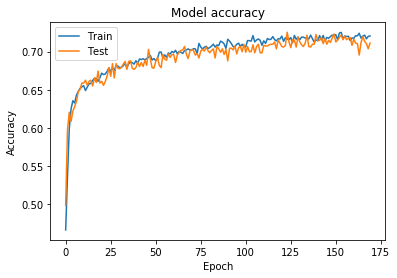

In [29]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix
dl_confusion_matrix = confusion_matrix(y_test, np.argmax(model.predict(X_test),axis=1))
print(dl_confusion_matrix)
print ("Neural Train Accuracy:", accuracy_score(y_train, np.argmax(model.predict(X_train), axis=1)))
print ("Neural Test Accuracy:", accuracy_score(y_test, np.argmax(model.predict(X_test), axis=1)))

[[  0  11   0   0   0   0   0  24]
 [  0 593   0   2  17   2   0  52]
 [  0   0   0   0   0   0   0   6]
 [  0  49   0   1   1   1   0  12]
 [  0  47   0   0  26   5   0  31]
 [  0  30   0   0   0  24   0  16]
 [  0   7   0   0   0   0   0   6]
 [  0  66   0   1   0   0   0 306]]
Neural Train Accuracy: 0.7383895131086142
Neural Test Accuracy: 0.7110778443113772


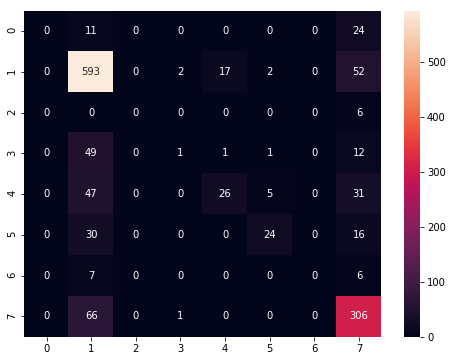

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
sbn.heatmap(dl_confusion_matrix, annot=True, annot_kws={"size": 10}, fmt='g', ax=ax)